In [93]:
import matplotlib.pyplot as plt
from astropy.nddata import CCDData
from astropy.io import fits
from ccdproc import Combiner
from astropy.visualization import hist
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
from convenience_functions import show_image

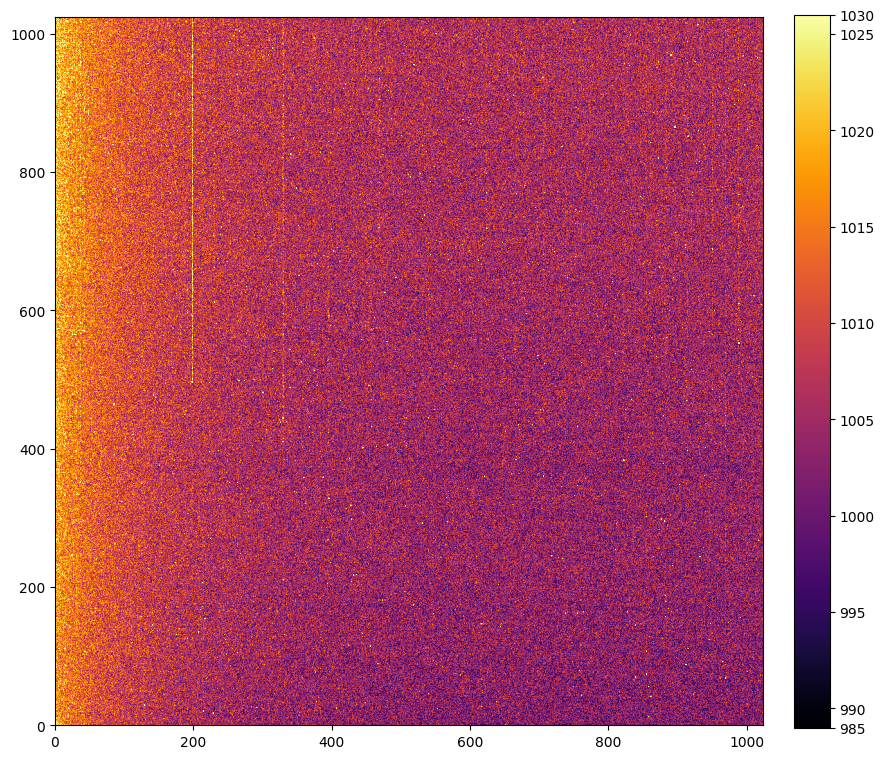

In [94]:
bias_image = CCDData.read('bias_frame.00000008.BIAS.FIT', unit='adu')
show_image(bias_image.data, cmap='inferno')

[]

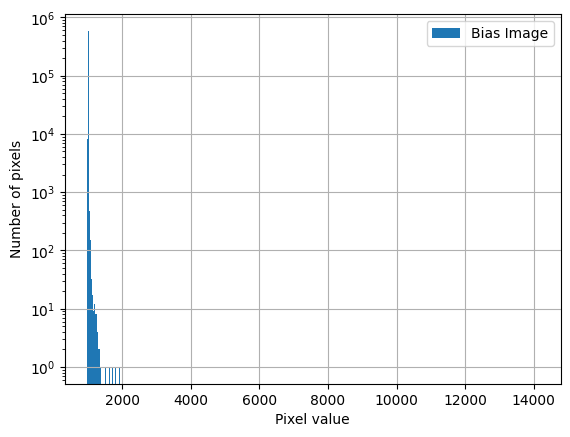

In [95]:
#Plot Histogram
data = bias_image.data.flatten()
hist(data, bins=800, label='Bias Image')
plt.grid()
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.semilogy() #y-axis in log-scale

Text(0, 0.5, 'Number of pixels')

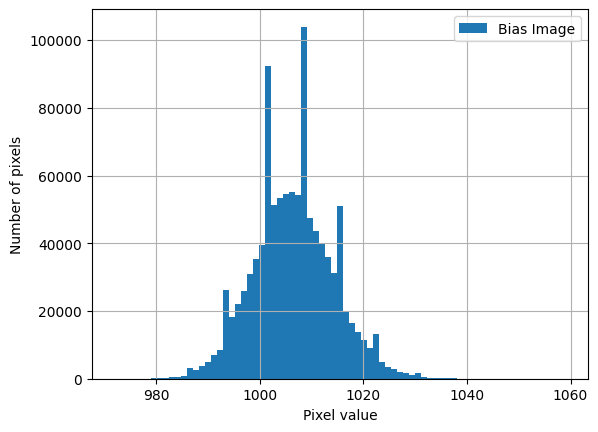

In [96]:
#Plot Cut Histogram 
data_cut = data[data<1060]
hist(data_cut, bins=75, label='Bias Image')
plt.grid()
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')

In [98]:
#Fraction of Pixels that get reject
count = 0
for i in range(len(data)):
    if bias_image.data.flatten()[i] > 1060:
        count = count + 1
print(f"The fraction of pixels that got rejected is {count / len(data)}")

The fraction of pixels that got rejected is 0.00033283233642578125


In [80]:
std = np.std(data_cut)
print(f'standard deviation is {std}')
mean = np.mean(data_cut)
print(f'mean is {mean}')

standard deviation is 7.7852523436307
mean is 1006.4807597274613


In [21]:
def g(sigma,u,x):
    return 1/(sigma*(np.sqrt(2*np.pi))) * np.exp(-(x - u)**2 / (2*sigma**2))

Text(0, 0.5, 'Number of pixels')

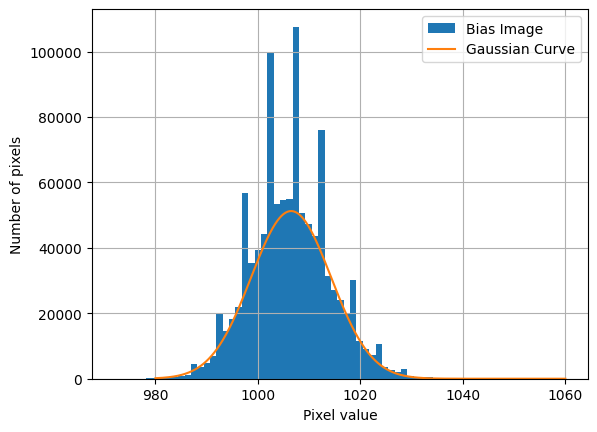

In [81]:
#Plot Histogram 
x = np.linspace(980,1060,1060)
data = bias_image.data[:,:].flatten()
data_cut = data[data<1060]
hist(data_cut, bins=70, label='Bias Image')
plt.plot(x, 1e6*g(std,mean,x), label='Gaussian Curve')
plt.grid()
plt.legend()
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')

In [82]:
photon_counts = np.sum(bias_image.data[:,:].flatten()) / 2
print(photon_counts)

527716243.5


In [86]:
ccd1 = CCDData.read('bias_frame.00000014.DARK.FIT', unit='adu')
ccd2 = CCDData.read('bias_frame.00000015.DARK.FIT', unit='adu')
ccd3 = CCDData.read('bias_frame.00000016.DARK.FIT', unit='adu')
ccd4 = CCDData.read('bias_frame.00000017.DARK.FIT', unit='adu')
ccd5 = CCDData.read('bias_frame.00000018.DARK.FIT', unit='adu')
ccd6 = CCDData.read('bias_frame.00000019.DARK.FIT', unit='adu')
ccd7 = CCDData.read('bias_frame.00000020.DARK.FIT', unit='adu')
ccd8 = CCDData.read('bias_frame.00000021.DARK.FIT', unit='adu')
ccd9 = CCDData.read('bias_frame.00000022.DARK.FIT', unit='adu')
ccd10 = CCDData.read('bias_frame.00000023.DARK.FIT', unit='adu')
ccd11 = CCDData.read('bias_frame.00000024.DARK.FIT', unit='adu')
ccd12 = CCDData.read('bias_frame.00000025.DARK.FIT', unit='adu')
ccd13 = CCDData.read('bias_frame.00000026.DARK.FIT', unit='adu')
ccd14 = CCDData.read('bias_frame.00000027.DARK.FIT', unit='adu')
ccd15 = CCDData.read('bias_frame.00000028.DARK.FIT', unit='adu')

combiner = Combiner([ccd1, ccd2, ccd3, ccd4, ccd5, ccd6, ccd7, ccd8, ccd9, ccd10, ccd11, ccd12, ccd13, ccd14, ccd15])

In [99]:
combined_median = np.array(combiner.median_combine())

In [91]:
hdu = fits.PrimaryHDU(combined_median)
hdul = fits.HDUList([hdu])
hdu.writeto('new2.fits')

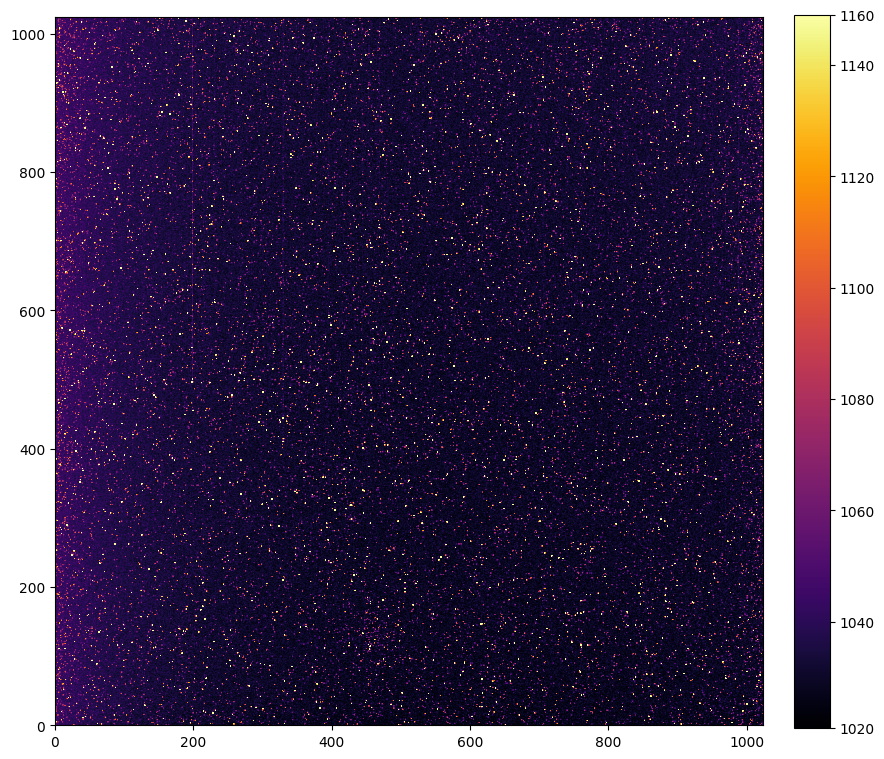

In [92]:
dark_image = CCDData.read('new2.fits', unit='adu')
show_image(dark_image.data, cmap='inferno')